In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
hares= pd.read_csv(os.path.join('data','knb-lter-bnz','55_Hare_Data_2012.txt'))
hares

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study
0,11/26/1998,NaN,bonrip,1A,414D096A08,NaN,NaN,NaN,1370.0,160.0,NaN,917.0,51,Population
1,11/26/1998,NaN,bonrip,2C,414D320671,NaN,M,NaN,1430.0,NaN,NaN,936.0,51,Population
2,11/26/1998,NaN,bonrip,2D,414D103E3A,NaN,M,NaN,1430.0,NaN,NaN,921.0,51,Population
3,11/26/1998,NaN,bonrip,2E,414D262D43,NaN,NaN,NaN,1490.0,135.0,NaN,931.0,51,Population
4,11/26/1998,NaN,bonrip,3B,414D2B4B58,NaN,NaN,NaN,1710.0,150.0,NaN,933.0,51,Population
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,8/8/2002,18:00:00,bonrip,1b,1201,1202,NaN,NaN,1400.0,NaN,NaN,63.0,64,Population
3376,8/8/2002,6:00:00,bonrip,4b,1201,1202,NaN,NaN,NaN,NaN,NaN,63.0,64,Population
3377,8/7/2002,NaN,bonrip,4b,1217,1218,NaN,NaN,1000.0,134.0,NaN,69.0,64,Population
3378,8/8/2002,NaN,bonrip,6d,1217,1218,NaN,NaN,990.0,NaN,NaN,69.0,64,Population


In [3]:
hares.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3380 entries, 0 to 3379
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        3380 non-null   object 
 1   time        264 non-null    object 
 2   grid        3380 non-null   object 
 3   trap        3368 non-null   object 
 4   l_ear       3332 non-null   object 
 5   r_ear       3211 non-null   object 
 6   sex         3028 non-null   object 
 7   age         1269 non-null   object 
 8   weight      2845 non-null   float64
 9   hindft      1633 non-null   float64
 10  notes       243 non-null    object 
 11  b_key       3333 non-null   float64
 12  session_id  3380 non-null   int64  
 13  study       3217 non-null   object 
dtypes: float64(3), int64(1), object(10)
memory usage: 369.8+ KB


In [4]:
hares.date = pd.to_datetime(hares.date)

In [38]:
hares.age.value_counts()

age
adult        759
juvenile     396
1/2/2013      21
1/4/2013      21
3/4/2013      18
1             12
U             11
?             10
2 yrs.         3
u              3
1.5            2
3.5 yrs.       2
2.25 yrs       2
1 yr.          2
1 yr           2
2.5 yrs        1
3 yrs.         1
2 yrs          1
1.25           1
3.25 yrs.      1
Name: count, dtype: int64

In [10]:
hares.loc[hares.age.str.contains('j', case=False, na=False), 'age'] = 'juvenile'
hares.loc[hares.age.str.contains('a', case=False, na=False), 'age'] = 'adult'

hares_ja = hares[hares.age.isin(['juvenile', 'adult'])].copy()
hares_ja.age.unique()

array(['juvenile', 'adult'], dtype=object)

In [12]:
hares_ja['year-month'] = hares_ja.date.dt.to_period('M')
hares_ja

,date,time,grid,trap,l_ear,r_ear,sex,age,weight,hindft,notes,b_key,session_id,study,year-month
108,1999-06-23,NaN,bonrip,2C,68,69,M,juvenile,395.0,126.0,NaN,643.0,53,Population,1999-06
109,1999-06-23,NaN,bonrip,2E,70,71,F,juvenile,420.0,137.0,NaN,653.0,53,Population,1999-06
110,1999-06-23,NaN,bonrip,3D,72,73,M,juvenile,445.0,144.0,NaN,944.0,53,Population,1999-06
111,1999-06-23,NaN,bonrip,4B,76,77,M,juvenile,410.0,115.0,NaN,663.0,53,Population,1999-06
112,1999-06-23,NaN,bonrip,4C,78,79,M,juvenile,430.0,132.0,NaN,670.0,53,Population,1999-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,2003-08-20,10:30:00,bonmat,3b,1512,1516,f,juvenile,650.0,104.0,NaN,93.0,45,Population,2003-08
3359,2003-08-21,8:35:00,bonmat,3a,1521,1522,f,juvenile,875.0,110.0,NaN,94.0,45,Population,2003-08
3360,2003-08-23,10:30:00,bonmat,3b,1521,1522,f,juvenile,875.0,110.0,NaN,94.0,45,Population,2003-08
3367,2004-08-27,NaN,bonmat,3c,1823,1824,f,juvenile,350.0,97.0,NaN,165.0,48,Population,2004-08


In [14]:
hares_ja = hares_ja.groupby(['year-month', 'age']).size().reset_index(name='counts')
hares_ja

,year-month,age,counts
0,1999-06,adult,3
1,1999-06,juvenile,31
2,1999-08,adult,147
3,1999-08,juvenile,88
4,1999-11,juvenile,7
...,...,...,...
60,2011-09,juvenile,13
61,2011-10,adult,2
62,2011-11,adult,3
63,2012-09,adult,5


In [16]:
hares_ja = hares_ja.pivot(index='year-month', columns='age', values='counts')
hares_ja

age,adult,juvenile
year-month,,
1999-06,3.0,31.0
1999-08,147.0,88.0
1999-11,NaN,7.0
2000-06,24.0,1.0
2000-08,54.0,46.0
2000-10,51.0,16.0
2000-11,30.0,4.0
2001-03,41.0,NaN
2001-06,11.0,4.0


In [ ]:
hares_ja['juvenile_prop'] = hares_ja['juvenile'] / (hares_ja['juvenile']+hares_ja['adult'])

<Axes: xlabel='year-month'>

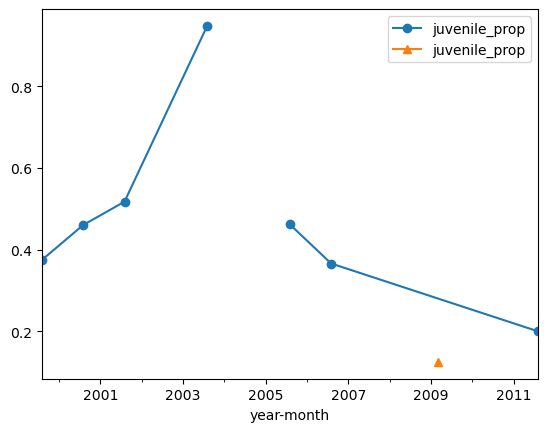

In [41]:
fig, ax = plt.subplots()

hares_ja[hares_ja.index.month == 8].plot(ax=ax, y='juvenile_prop', marker='o', linestyle='-')
hares_ja[hares_ja.index.month == 3].plot(ax=ax, y='juvenile_prop', marker='^', linestyle='-')


In [ ]:
hares_ja = hares_ja.reset_index()
hares_ja['year'] = hares_ja['year-month'].dt.year
hares_ja['month'] = hares_ja['year-month'].dt.month

age,year-month,adult,juvenile,juvenile_prop
0,1999-06,3.0,31.0,0.911765
1,1999-08,147.0,88.0,0.374468
2,1999-11,NaN,7.0,NaN
3,2000-06,24.0,1.0,0.040000
4,2000-08,54.0,46.0,0.460000
5,2000-10,51.0,16.0,0.238806
6,2000-11,30.0,4.0,0.117647
7,2001-03,41.0,NaN,NaN
8,2001-06,11.0,4.0,0.266667
9,2001-08,14.0,15.0,0.517241
